In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

import utils

In [2]:
%ls -R spectra/

spectra/:
ardata.fits  HD110379/  HD186791/  X0319/  X0386/  X0538/  X0771/

spectra/HD110379:
BG20000                             tellstar_qvir_ordens_finalglue.fits
obs_HD110379_ordens_finalglue.fits

spectra/HD186791:
BG20000                             tellstar_35aql_ordens_finalglue.fits
obs_HD186791_ordens_finalglue.fits

spectra/X0319:
X0319_N_O_E.fits            X0319_U_O_E.fits      X0319_V_O_E.fits
X0319_N_O_E_TAC_final.fits  X0319_U_O_E_TAC.fits  X0319_V_O_E_TAC_final.fits
X0319_N_O_E_TRA.fits        X0319_U_O_E_TRA.fits  X0319_V_O_E_TRA.fits

spectra/X0386:
X0386_N_N_E.fits            X0386_U_N_E.fits      X0386_V_N_E.fits
X0386_N_N_E_TAC_final.fits  X0386_U_N_E_TAC.fits  X0386_V_N_E_TAC_final.fits
X0386_N_N_E_TRA.fits        X0386_U_N_E_TRA.fits  X0386_V_N_E_TRA.fits

spectra/X0538:
X0538_N_N_E.fits            X0538_U_N_E.fits      X0538_V_N_E.fits
X0538_N_N_E_TAC_final.fits  X0538_U_N_E_TAC.fits  X0538_V_N_E_TAC_final.fits
X0538_N_N_E_TRA.fits        X0538_U_N_E_TRA.fits 

### X0319

In [3]:
X0319_obs_flux, X0319_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E.fits')
X0319_tel_flux, X0319_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E_TRA.fits')
X0319_corr_flux, X0319_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0319/X0319_V_O_E_TAC_final.fits')

In [4]:
X0319_gt_atm = X0319_obs_flux / X0319_corr_flux

In [5]:
all(X0319_gt_atm == X0319_tel_flux)

False

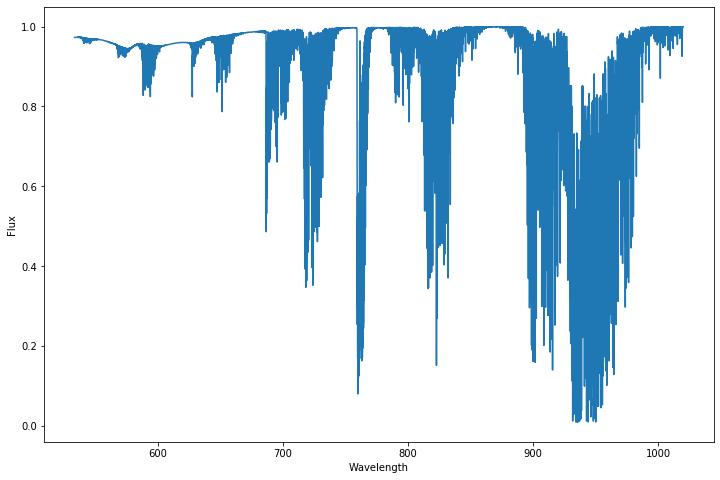

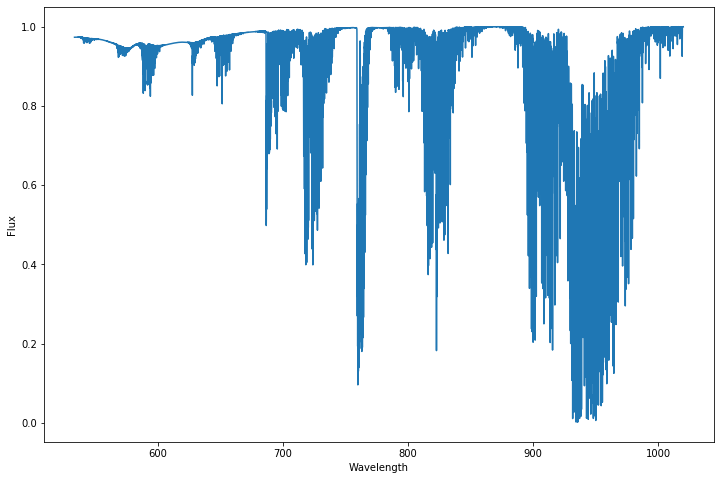

In [6]:
utils.plot_spectrum(X0319_gt_atm, X0319_tel_wl)
utils.plot_spectrum(X0319_tel_flux, X0319_tel_wl)

Formato dos dois espectros atm e atm' são extremamente parecidos. Parece ser um bom caminho,

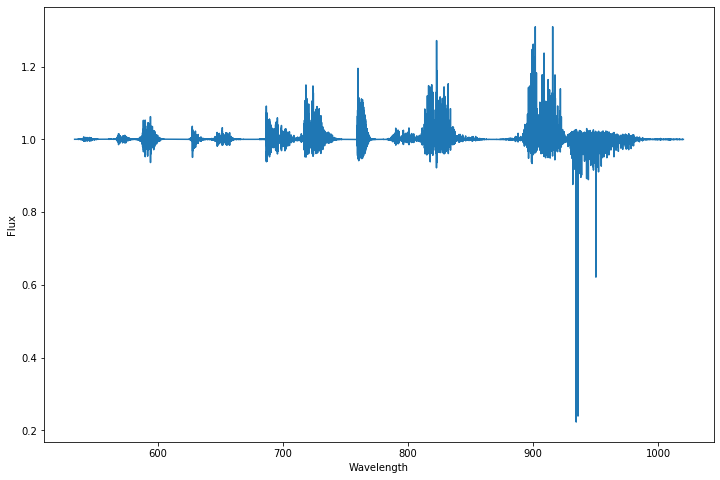

In [7]:
X0319_atm_div = X0319_tel_flux / X0319_gt_atm
utils.plot_spectrum(X0319_atm_div, X0319_tel_wl)

Distance: 91.98515321405769
Are all warp path indices aligned? False


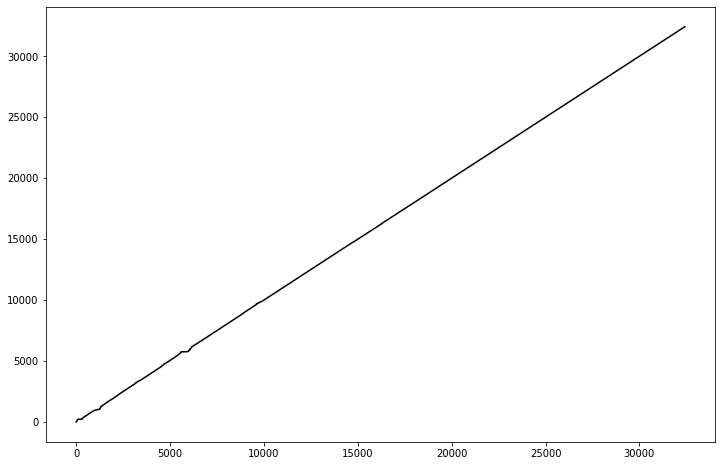

Elapsed time in seconds: 1.5557124614715576


In [8]:
start = time.time()
_, dtw_path = utils.fast_dtw_on_stellar_spectra(X0319_tel_flux, X0319_gt_atm)
end = time.time()
print('Elapsed time in seconds: {}'.format(end - start))

In [9]:
dtw_path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 38),
 (39, 39),
 (40, 40),
 (41, 41),
 (42, 42),
 (42, 43),
 (42, 44),
 (42, 45),
 (42, 46),
 (42, 47),
 (42, 48),
 (42, 49),
 (42, 50),
 (42, 51),
 (42, 52),
 (42, 53),
 (42, 54),
 (42, 55),
 (42, 56),
 (42, 57),
 (42, 58),
 (42, 59),
 (42, 60),
 (42, 61),
 (42, 62),
 (42, 63),
 (42, 64),
 (42, 65),
 (42, 66),
 (42, 67),
 (42, 68),
 (43, 69),
 (43, 70),
 (43, 71),
 (43, 72),
 (43, 73),
 (43, 74),
 (43, 75),
 (43, 76),
 (43, 77),
 (43, 78),
 (43, 79),
 (43, 80),
 (43, 81),
 (43, 82),
 (43, 83),
 (43, 84),
 (43, 85),
 (43, 86),
 (43, 87),
 (43, 88),
 (43, 89),
 (43, 90),
 (43, 91),
 (43, 92

### X0386

In [10]:
X0386_obs_flux, X0386_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0386/X0386_V_N_E.fits')
X0386_tel_flux, X0386_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0386/X0386_V_N_E_TRA.fits')
X0386_corr_flux, X0386_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0386/X0386_V_N_E_TAC_final.fits')

In [11]:
X0386_gt_atm = X0386_obs_flux / X0386_corr_flux
all(X0386_gt_atm == X0386_tel_flux)

False

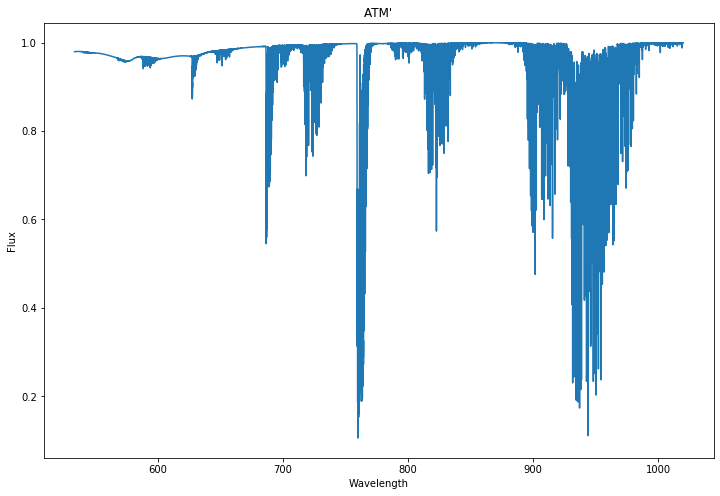

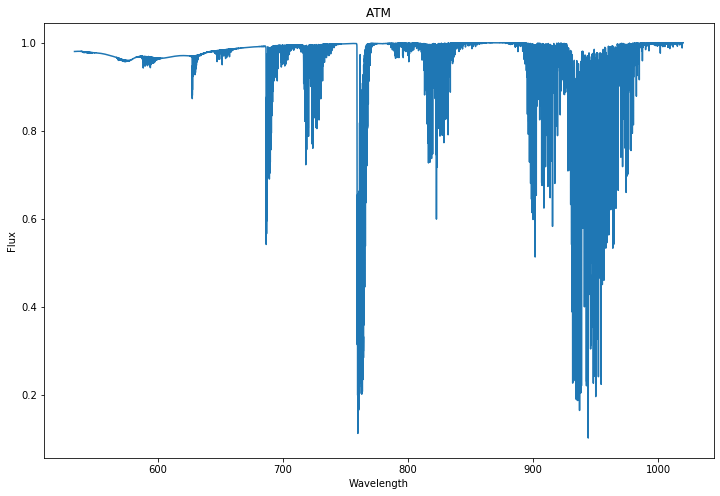

In [13]:
utils.plot_spectrum(X0386_gt_atm, X0386_tel_wl, "ATM'")
utils.plot_spectrum(X0386_tel_flux, X0386_tel_wl, 'ATM')

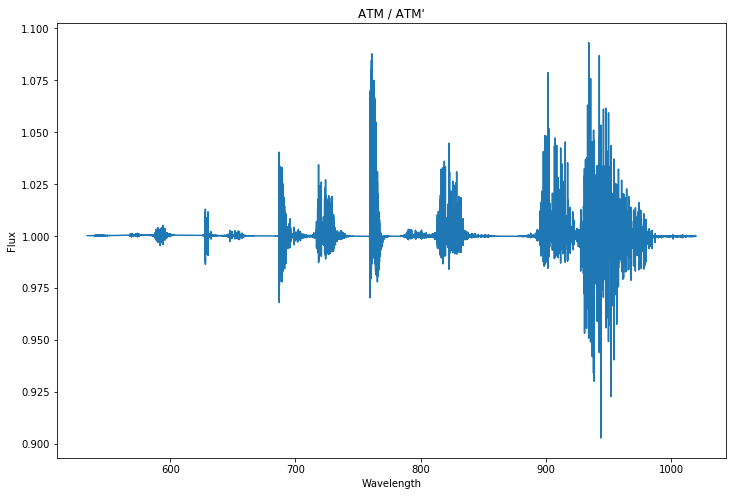

In [14]:
X0386_atm_div = X0386_tel_flux / X0386_gt_atm
utils.plot_spectrum(X0386_atm_div, X0386_tel_wl, "ATM / ATM'")

Distance: 38.067973852870594
Are all warp path indices aligned? False


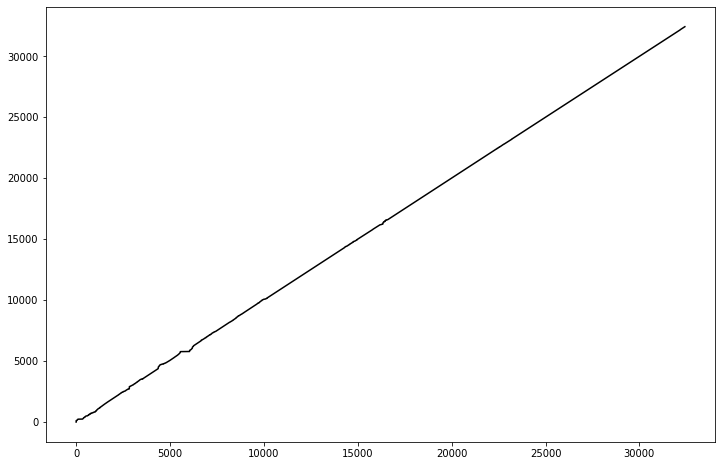

Elapsed time in seconds: 1.6281607151031494


In [15]:
start = time.time()
dtw_path = utils.fast_dtw_on_stellar_spectra(X0386_tel_flux, X0386_gt_atm)
end = time.time()
print('Elapsed time in seconds: {}'.format(end - start))

### X0538

In [17]:
X0538_obs_flux, X0538_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0538/X0538_V_N_E.fits')
X0538_tel_flux, X0538_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0538/X0538_V_N_E_TRA.fits')
X0538_corr_flux, X0538_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0538/X0538_V_N_E_TAC_final.fits')

In [18]:
X0538_gt_atm = X0538_obs_flux / X0538_corr_flux
all(X0538_gt_atm == X0538_tel_flux)

False

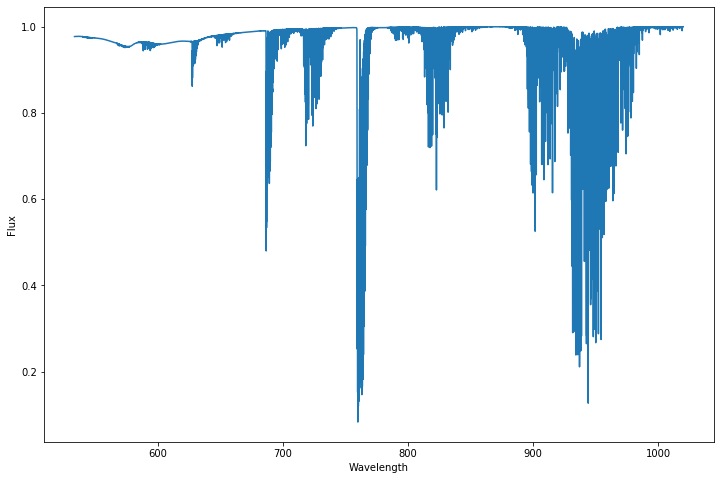

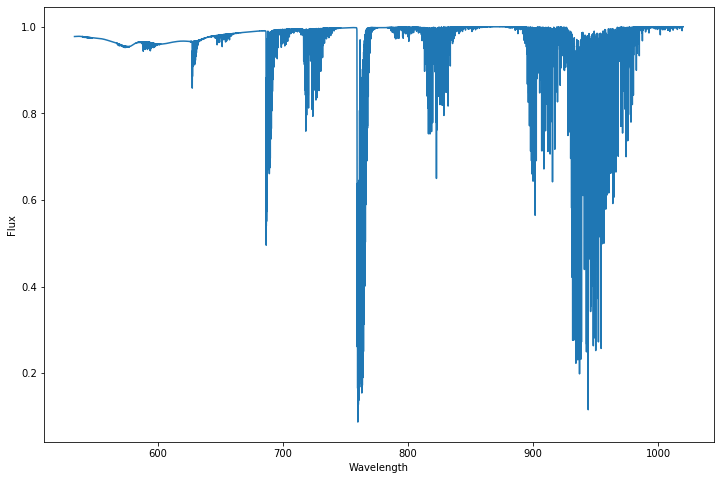

In [19]:
utils.plot_spectrum(X0538_gt_atm, X0538_tel_wl)
utils.plot_spectrum(X0538_tel_flux, X0538_tel_wl)

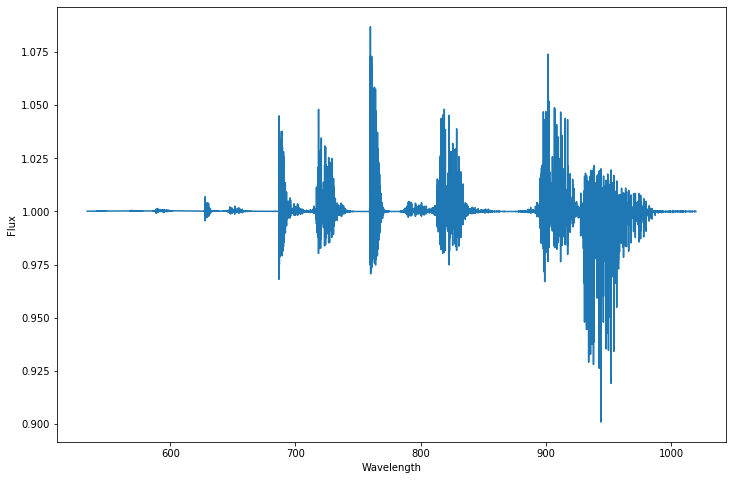

In [20]:
X0538_atm_div = X0538_tel_flux / X0538_gt_atm
utils.plot_spectrum(X0538_atm_div, X0538_tel_wl)

Distance: 34.40824748871654
Are all warp path indices aligned? False


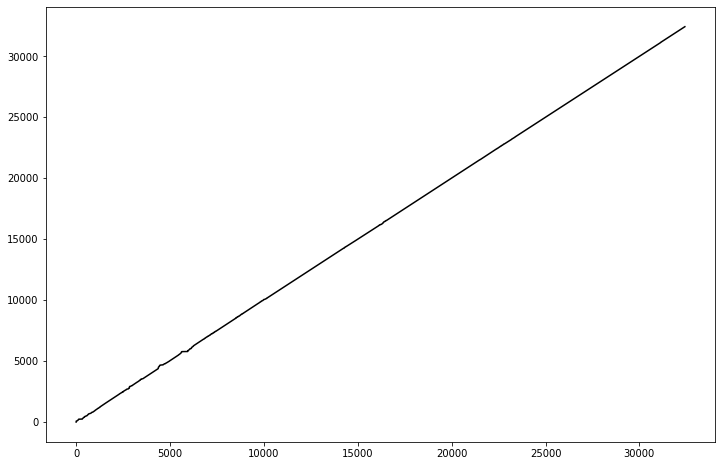

Elapsed time in seconds: 0.9863600730895996


In [21]:
start = time.time()
dtw_path = utils.fast_dtw_on_stellar_spectra(X0538_tel_flux, X0538_gt_atm)
end = time.time()
print('Elapsed time in seconds: {}'.format(end - start))

### X0771

In [22]:
X0771_obs_flux, X0771_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0771/X0771_V_N_E.fits')
X0771_tel_flux, X0771_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0771/X0771_V_N_E_TRA.fits')
X0771_corr_flux, X0771_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0771/X0771_V_N_E_TAC_final.fits')

In [23]:
X0771_gt_atm = X0771_obs_flux / X0771_corr_flux
all(X0771_gt_atm == X0771_tel_flux)

False

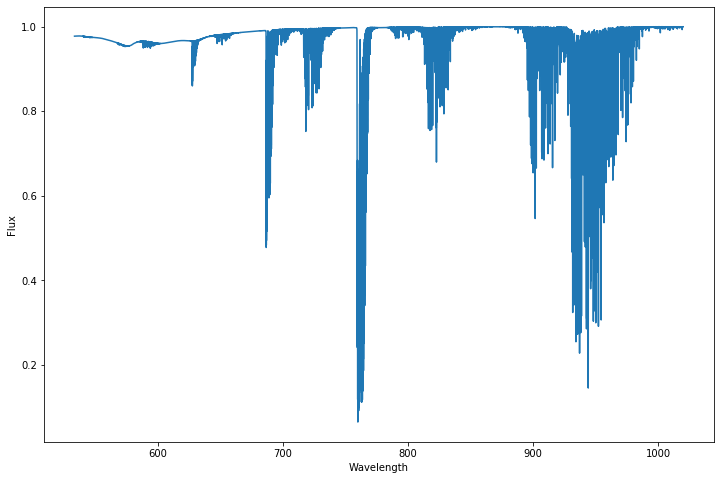

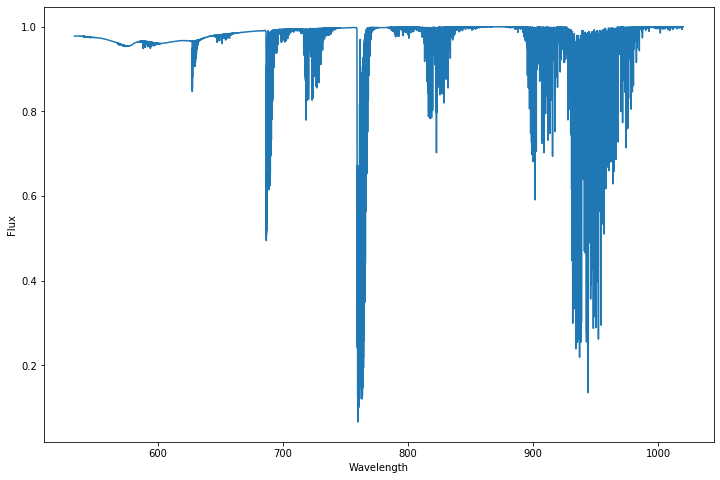

In [24]:
utils.plot_spectrum(X0771_gt_atm, X0771_tel_wl)
utils.plot_spectrum(X0771_tel_flux, X0771_tel_wl)

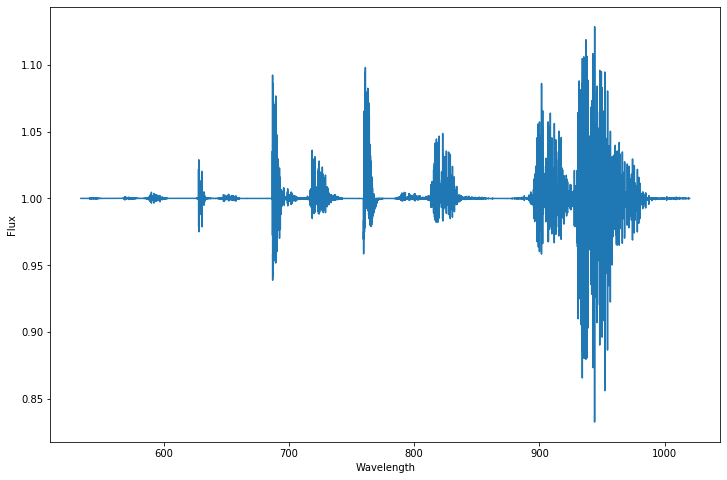

In [25]:
X0771_atm_div = X0771_tel_flux / X0771_gt_atm
utils.plot_spectrum(X0771_atm_div, X0771_tel_wl)

Distance: 50.60195073339825
Are all warp path indices aligned? False


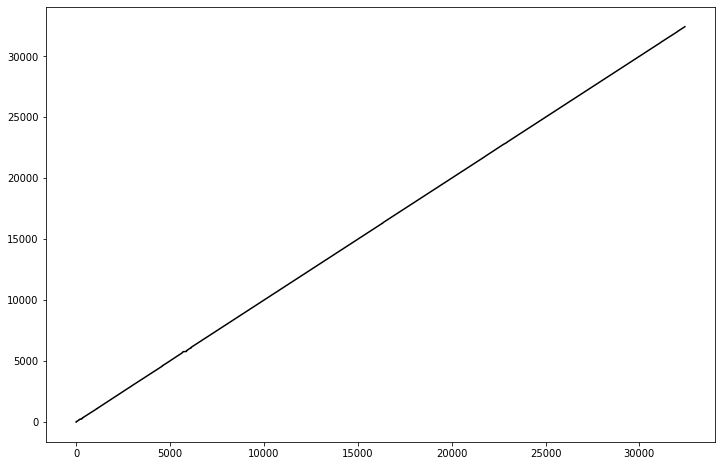

Elapsed time in seconds: 1.0818798542022705


In [26]:
start = time.time()
dtw_path = utils.fast_dtw_on_stellar_spectra(X0771_tel_flux, X0771_gt_atm)
end = time.time()
print('Elapsed time in seconds: {}'.format(end - start))